In [1]:
#importing dependencies 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pingouin as pg
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats  as stats
import seaborn as sns

C:\Users\danie\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#Reading CSV file
df = pd.read_csv("bonus.csv")
df.head()

,emp_no,last_name,first_name,title,salary,dept_name
0,10005,Maliniak,Kyoichi,Staff,78228,Human Resources
1,10010,Piveteau,Duangkaew,Engineer,72488,Production
2,10010,Piveteau,Duangkaew,Engineer,72488,Quality Management
3,10011,Sluis,Mary,Staff,42365,Customer Service
4,10013,Terkki,Eberhardt,Senior Staff,40000,Human Resources


In [3]:
#Creating df specific for salary and department name
salary_dept_name_df = df.drop(columns=['emp_no','last_name','first_name', 'title'])
salary_dept_name_df

,salary,dept_name
0,78228,Human Resources
1,72488,Production
2,72488,Quality Management
3,42365,Customer Service
4,40000,Human Resources
...,...,...
331598,40000,Production
331599,41002,Development
331600,40000,Research
331601,52282,Sales


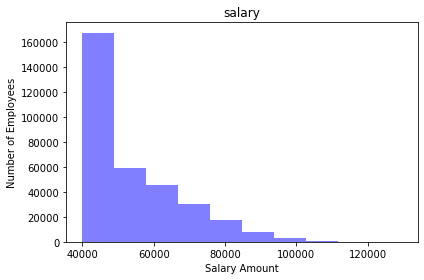

In [13]:
#Plotting histogram to visualize the most common salary ranges for employees.
salary_dept_name_df.hist(facecolor='blue', alpha=0.5)
plt.xlabel('Salary Amount')
plt.ylabel('Number of Employees')
#plt.title('Most Common Salary Ranges For Employees')
plt.grid()
plt.tight_layout()
plt.savefig("Images/Salary.png", facecolor = "w", bbox_inches= "tight" )
plt.show()

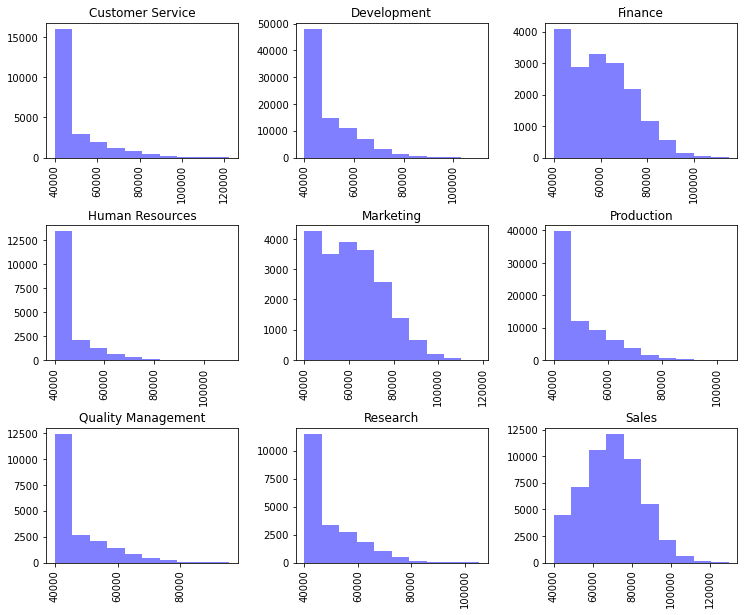

In [5]:
#Creating individual histograms to show case each departments most common salary ranges for employees.
salary_dept_name_df.hist(column='salary', by='dept_name', figsize=(12,10), facecolor='blue', alpha=0.5);


In [6]:
#showing the original df
df

,emp_no,last_name,first_name,title,salary,dept_name
0,10005,Maliniak,Kyoichi,Staff,78228,Human Resources
1,10010,Piveteau,Duangkaew,Engineer,72488,Production
2,10010,Piveteau,Duangkaew,Engineer,72488,Quality Management
3,10011,Sluis,Mary,Staff,42365,Customer Service
4,10013,Terkki,Eberhardt,Senior Staff,40000,Human Resources
...,...,...,...,...,...,...
331598,499948,Paludetto,Cordelia,Engineer,40000,Production
331599,499972,Leuchs,Katsuo,Senior Engineer,41002,Development
331600,499985,Lukaszewicz,Gila,Staff,40000,Research
331601,499987,Dusink,Rimli,Staff,52282,Sales


In [7]:
#Creating an specific df for title and salary

title_salary_df= df.drop(columns=['emp_no', 'last_name',"first_name", 'dept_name'])
ts_df = title_salary_df.groupby(['title']).mean()
ts_df.sort_values(by = ['salary'],ascending=False, inplace=True)

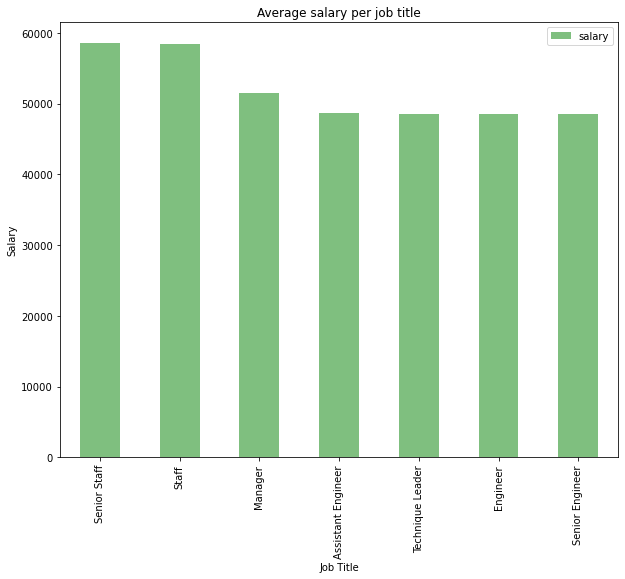

In [8]:
# creating bar chart of average salary by title.
ts_df.plot(kind='bar', facecolor='green', alpha=0.5, title="Average salary per job title", ylabel='Salary', xlabel='Job Title', figsize=(10,8))
plt.title = ("Average salary per job title")
plt.ylable=('Salary')
plt.show()

In [9]:
#Creating a bar graoh with sns
sns_ts_df= ts_df.reset_index()
sns_ts_df.sort_values(by = ['salary'],ascending=False, inplace=True)

<ipython-input-11-8af424396501>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


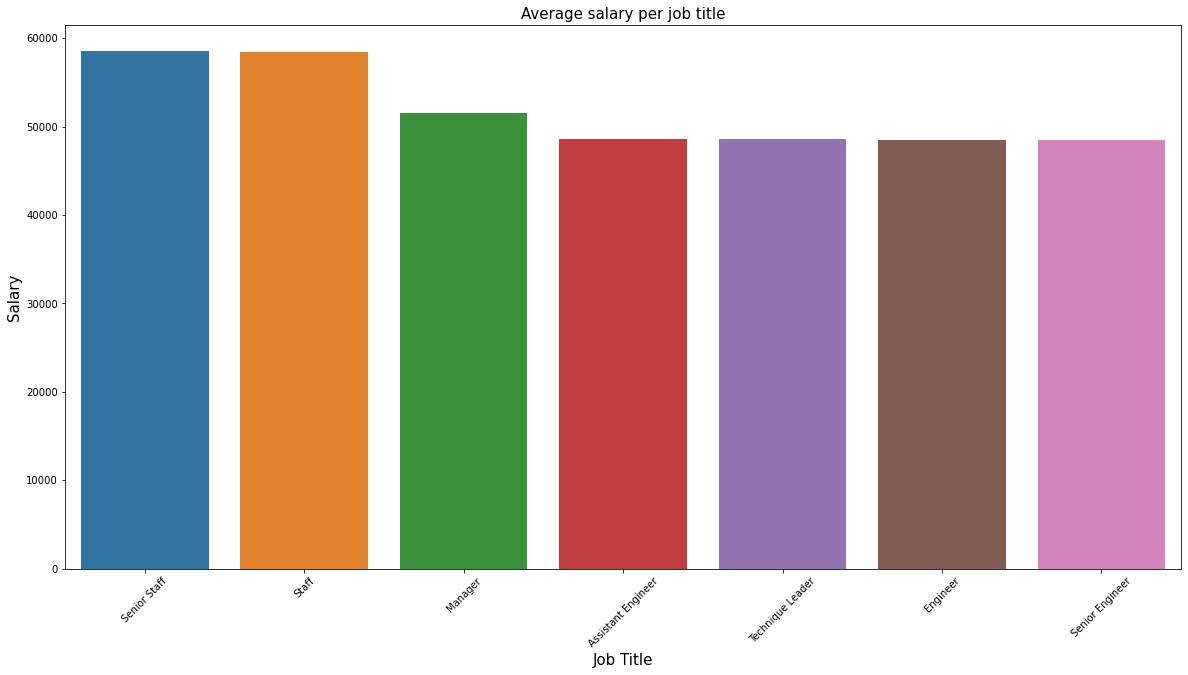

In [11]:
#Plotting graph with SNS

plt.figure(figsize=(20,10))
sns.barplot(x='title', y='salary', data = sns_ts_df)

ax = plt.axes()

ax.set_title("Average salary per job title", size = 15)

plt.xlabel('Job Title', size =15)
plt.ylabel('Salary',size= 15)
plt.xticks([0,1,2,3,4,5,6], rotation=45)
plt.savefig("Images/Avg-title.png", facecolor = "w", bbox_inches= "tight" )
plt.show();